In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from mcdrift import *

In this experiment, we would like to understand if the performance of P-CDM and NP-CDM is affected by whether $P_0$ and $P_1$ are close to each other.

We set the following parameters:

1. $N = 5$ (number of states)

2. $T = 10,000$ (sequence length)

3. $t^* = 2,000$ (time abrupt change occurs)

4. $L = 1,000$ (number of observations guaranteed to come from $P_0$)

5. $W = 5$ (subsequence length)

6. $K = 10$ (detection threshold)

We randomly generate $P_0$ and $P_1$ from the standard uniform distribution and normalize such that each row sums to 1. We set $\pi = (0.2, 0.2, 0.2, 0.2, 0.2)$.

Also, we estimate the time of abrupt change using the center of the predicted interval. For example, when $W = 10$ and the change is detected in $s_k$ with $91 \leq k \leq 100$, the estimated time is simply $(100+91)/2 = 95.5$.

We repeat the experiments $1,000$ times and and record the estimated times as well as $||P_0 - P_1||_F$.

In [79]:
N = 5
T = 10000
tstar = 2000
L = 1000
W = 5
K = 10
pi = np.array([1/5, 1/5, 1/5, 1/5, 1/5])

frob_norm = []
est_time_p = []
est_time_np = []

seed = 2023
n_rep = 1000

In [80]:
np.random.seed(seed)

for _ in tqdm(range(n_rep)):
    
    p0 = np.random.rand(N,N)
    p0 = p0/p0.sum(axis=1,keepdims=1)
    p1 = np.random.rand(N,N)
    p1 = p1/p1.sum(axis=1,keepdims=1)
    
    seq_sim = simulate_mc(pi, p0, tstar)
    init_vec = np.zeros(N)
    init_vec[seq_sim[-1]] = 1
    seq_sim_2 = simulate_mc(init_vec, p1, T - tstar + 1)
    seq_comb = seq_sim + seq_sim_2[1:]
    
    pcdm_res = pcdm(seq_comb, W, p0, p1, K)
    npcdm_res = npcdm(seq_comb, W, N, L, K)
    
    if type(pcdm_res) == str:
        pcdm_res = T/W
    if type(npcdm_res) == str:
        npcdm_res = T/W
    
    est_time_p.append((2 * W * pcdm_res + W + 1)/2)
    est_time_np.append((2 * W * npcdm_res + W + 1)/2)
    frob_norm.append(np.sqrt(np.sum((p0 - p1)**2)))

100%|██████████| 1000/1000 [03:45<00:00,  4.42it/s]


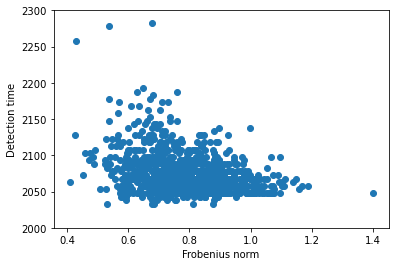

In [94]:
plt.scatter(frob_norm, est_time_p)
plt.ylim(2000,2300);
plt.xlabel('Frobenius norm');
plt.ylabel('Detection time');

In [92]:
len([x for x in est_time_np if x > 10000])

73

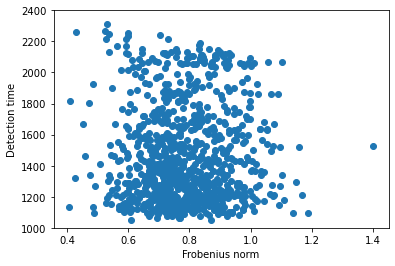

In [93]:
plt.scatter(frob_norm, est_time_np)
plt.ylim(1000,2400);
plt.xlabel('Frobenius norm');
plt.ylabel('Detection time');